# CIFAR-10 com CNN


#Importando bibliotecas

In [ ]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG19
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Carregando base de dados

In [ ]:

(imagens_treino, rotulos_treino), (imagens_teste, rotulos_teste) = cifar10.load_data()
imagens_treino, imagens_teste = imagens_treino / 255.0, imagens_teste / 255.0

imagens_treino, imagens_val,rotulos_treino,rotulos_val=train_test_split(
    imagens_treino,
    rotulos_treino,
    test_size=0.15)


rotulos_treino = to_categorical(rotulos_treino)
rotulos_val = to_categorical(rotulos_val)
rotulos_teste = to_categorical(rotulos_teste)

epochs = 15

170498071/170498071 [==============================] - 2s 0us/step


#CNN sem Transfer Learning

In [ ]:

modelo = models.Sequential()
modelo.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
modelo.add(layers.MaxPooling2D((2, 2)))
modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo.add(layers.MaxPooling2D((2, 2)))
modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo.add(layers.Flatten())
modelo.add(layers.Dense(64, activation='relu'))
modelo.add(layers.Dense(10, activation='softmax'))

modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_callback = ModelCheckpoint('model_epoch_{epoch:02d}.h5', save_freq='epoch')

cnn_history = modelo.fit(imagens_treino,
                     rotulos_treino,
                     epochs=epochs,
                     validation_data=(imagens_val, rotulos_val),
                     callbacks=[checkpoint_callback])

Epoch 1/15
1329/1329 [==============================] - 57s 42ms/step - loss: 1.5743 - accuracy: 0.4241 - val_loss: 1.4689 - val_accuracy: 0.4875
Epoch 2/15
   3/1329 [..............................] - ETA: 44s - loss: 1.5657 - accuracy: 0.4375

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1329/1329 [==============================] - 65s 49ms/step - loss: 1.2412 - accuracy: 0.5565 - val_loss: 1.1615 - val_accuracy: 0.5840
Epoch 3/15
1329/1329 [==============================] - 61s 46ms/step - loss: 1.0850 - accuracy: 0.6153 - val_loss: 1.0774 - val_accuracy: 0.6201
Epoch 4/15
1329/1329 [==============================] - 51s 39ms/step - loss: 0.9735 - accuracy: 0.6566 - val_loss: 0.9656 - val_accuracy: 0.6613
Epoch 5/15
1329/1329 [==============================] - 51s 38ms/step - loss: 0.8925 - accuracy: 0.6884 - val_loss: 0.9057 - val_accuracy: 0.6824
Epoch 6/15
1329/1329 [==============================] - 51s 38ms/step - loss: 0.8255 - accuracy: 0.7130 - val_loss: 0.9396 - val_accuracy: 0.6719
Epoch 7/15
1329/1329 [==============================] - 51s 39ms/step - loss: 0.7767 - accuracy: 0.7272 - val_loss: 0.8816 - val_accuracy: 0.6956
Epoch 8/15
1329/1329 [==============================] - 51s 39ms/step - loss: 0.7245 - accuracy: 0.7461 - val_loss: 0.8695 - val_accura

In [ ]:
for i in range(0, epochs):
  print("Época " + str(i + 1) + " -> Acurácia: " + str(cnn_history.history['accuracy'][i]) + " e Loss: " + str(cnn_history.history['loss'][i]))

Época 1 -> Acurácia: 0.4279294013977051 e Loss: 1.5718770027160645
Época 2 -> Acurácia: 0.577435314655304 e Loss: 1.196360468864441
Época 3 -> Acurácia: 0.6348470449447632 e Loss: 1.0393173694610596
Época 4 -> Acurácia: 0.6736470460891724 e Loss: 0.9327150583267212
Época 5 -> Acurácia: 0.6955058574676514 e Loss: 0.8646298050880432
Época 6 -> Acurácia: 0.7187294363975525 e Loss: 0.8033531308174133
Época 7 -> Acurácia: 0.7348940968513489 e Loss: 0.7575903534889221
Época 8 -> Acurácia: 0.7540000081062317 e Loss: 0.7054414749145508
Época 9 -> Acurácia: 0.7643764615058899 e Loss: 0.667816698551178
Época 10 -> Acurácia: 0.7745882272720337 e Loss: 0.6378182768821716
Época 11 -> Acurácia: 0.7857646942138672 e Loss: 0.60369873046875
Época 12 -> Acurácia: 0.80028235912323 e Loss: 0.5663241147994995
Época 13 -> Acurácia: 0.8101646900177002 e Loss: 0.5336121320724487
Época 14 -> Acurácia: 0.820588231086731 e Loss: 0.5034712553024292
Época 15 -> Acurácia: 0.8318352699279785 e Loss: 0.47152319550514

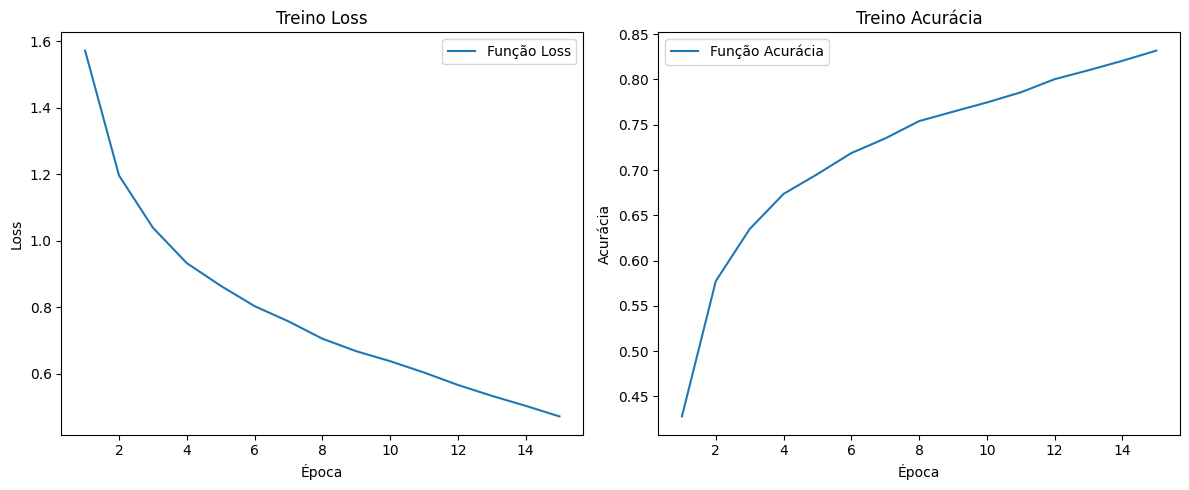

In [ ]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1),cnn_history.history['loss'],label='Função Loss')
plt.title('Treino Loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1),cnn_history.history['accuracy'],label='Função Acurácia')
plt.title('Treino Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
cnn_test_accuracy = []
cnn_test_loss = []

for i in range(1, epochs + 1):
  modelo.load_weights(f'model_epoch_{i:02d}.h5')

  test_loss, test_accuracy = modelo.evaluate(imagens_teste, rotulos_teste, verbose=0)

  cnn_test_loss.append(test_loss)
  cnn_test_accuracy.append(test_accuracy)

  print("Época " + str(i) + " -> Acurácia: " + str(cnn_test_accuracy[i - 1]) + " e Loss: " + str(cnn_test_loss[i - 1]))

Época 1 -> Acurácia: 0.53329998254776 e Loss: 1.2900633811950684
Época 2 -> Acurácia: 0.5943999886512756 e Loss: 1.1453732252120972
Época 3 -> Acurácia: 0.6341999769210815 e Loss: 1.0404256582260132
Época 4 -> Acurácia: 0.6510999798774719 e Loss: 0.9984216690063477
Época 5 -> Acurácia: 0.6743000149726868 e Loss: 0.9404172897338867
Época 6 -> Acurácia: 0.6815999746322632 e Loss: 0.9037618041038513
Época 7 -> Acurácia: 0.685699999332428 e Loss: 0.9119420051574707
Época 8 -> Acurácia: 0.6836000084877014 e Loss: 0.9126096963882446
Época 9 -> Acurácia: 0.6829000115394592 e Loss: 0.9311965107917786
Época 10 -> Acurácia: 0.699400007724762 e Loss: 0.9020427465438843
Época 11 -> Acurácia: 0.6751000285148621 e Loss: 0.994752824306488
Época 12 -> Acurácia: 0.6912000179290771 e Loss: 0.9338377118110657
Época 13 -> Acurácia: 0.6933000087738037 e Loss: 0.9555076360702515
Época 14 -> Acurácia: 0.7056000232696533 e Loss: 0.9691241383552551
Época 15 -> Acurácia: 0.6976000070571899 e Loss: 1.01766467094

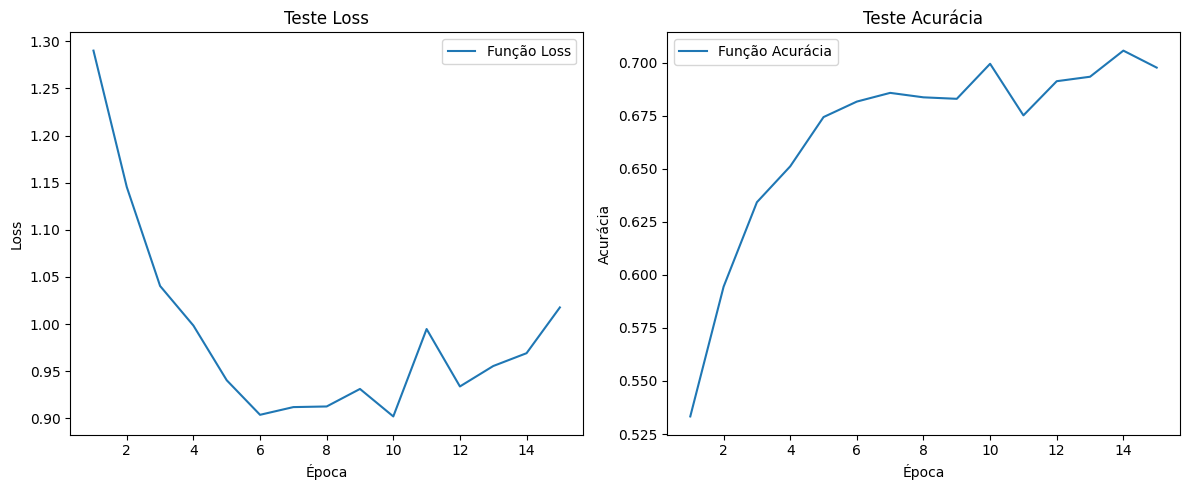

In [ ]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

plt.plot(range(1, epochs + 1),cnn_test_loss,label='Função Loss')

plt.title('Teste Loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(range(1, epochs + 1),cnn_test_accuracy,label='Função Acurácia')

plt.title('Teste Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

# CNN com Transferencia de Aprendizado da base de dados VGG19

In [ ]:
conv_base = VGG19(include_top=False,
                  weights='imagenet',
                  input_shape=(32,32,3),
                  classes=rotulos_treino.shape[1])
conv_base.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [ ]:

for layer in conv_base.layers:

  layer.trainable = False

  if "input_3" in layer.name:
    layer.trainable = True
  if "block1_conv1" in layer.name:
    layer.trainable = True
  if "block1_conv2" in layer.name:
    layer.trainable = True
  if "block1_pool" in layer.name:
    layer.trainable = True
  if "block2_conv1" in layer.name:
    layer.trainable = True

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 20158282 (76.90 MB)
Trainable params: 246474 (962.79 KB)
Non-trainable params: 19911808 (75.96 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoint_callback = ModelCheckpoint('model_epoch_{epoch:02d}.h5', save_freq='epoch')

tl_history = model.fit(imagens_treino,
                    rotulos_treino,
                    epochs = epochs,
                    validation_data=(imagens_val, rotulos_val),
                    callbacks=[checkpoint_callback])

Epoch 1/15
1329/1329 [==============================] - ETA: 0s - loss: 0.9702 - accuracy: 0.6574

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1329/1329 [==============================] - 33s 23ms/step - loss: 0.9702 - accuracy: 0.6574 - val_loss: 0.8376 - val_accuracy: 0.7040
Epoch 2/15
1329/1329 [==============================] - 30s 23ms/step - loss: 0.7715 - accuracy: 0.7313 - val_loss: 0.8068 - val_accuracy: 0.7173
Epoch 3/15
1237/1329 [==========================>...] - ETA: 1s - loss: 0.6989 - accuracy: 0.7540

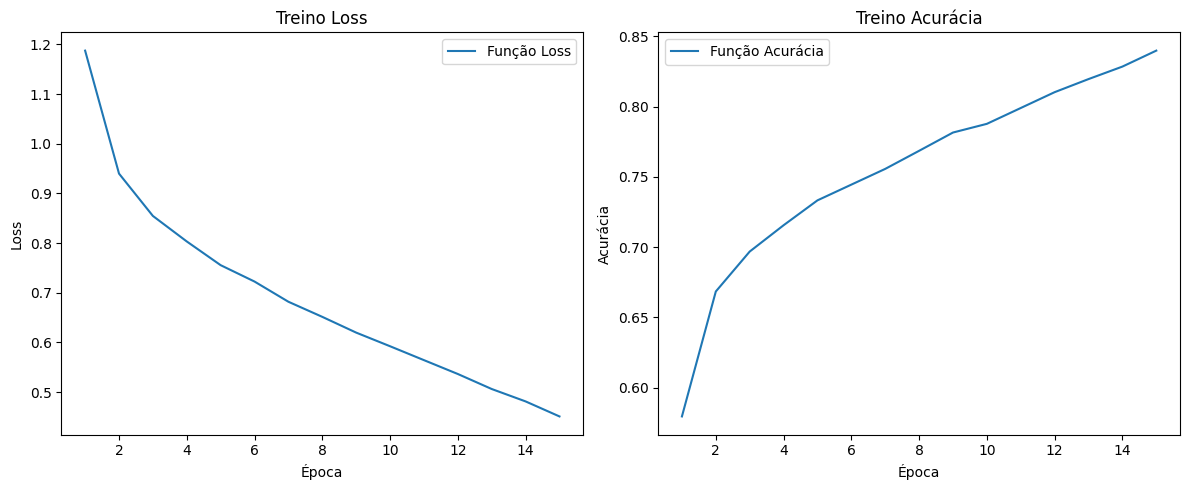

In [ ]:
# Plotar as curvas
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

plt.plot(range(1, epochs + 1),
         tl_history.history['loss'],
         label='Função Loss')

plt.title('Treino Loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(range(1, epochs + 1),
         tl_history.history['accuracy'],
         label='Função Acurácia')

plt.title('Treino Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
tl_test_accuracy = []
tl_test_loss = []

for i in range(1, epochs + 1):
  model.load_weights(f'model_epoch_{i:02d}.h5')

  test_loss, test_accuracy = model.evaluate(imagens_teste, rotulos_teste, verbose=0)

  tl_test_loss.append(test_loss)
  tl_test_accuracy.append(test_accuracy)

  print("Época " + str(i) + " -> Acurácia: " + str(tl_test_accuracy[i - 1]) + " e Loss: " + str(tl_test_loss[i - 1]))

Época 1 -> Acurácia: 0.6384000182151794 e Loss: 1.0251176357269287
Época 2 -> Acurácia: 0.6786999702453613 e Loss: 0.9306131601333618
Época 3 -> Acurácia: 0.690500020980835 e Loss: 0.8796776533126831
Época 4 -> Acurácia: 0.6992999911308289 e Loss: 0.8524521589279175
Época 5 -> Acurácia: 0.7028999924659729 e Loss: 0.8487197160720825
Época 6 -> Acurácia: 0.7080000042915344 e Loss: 0.8367820382118225
Época 7 -> Acurácia: 0.7222999930381775 e Loss: 0.790563702583313
Época 8 -> Acurácia: 0.725600004196167 e Loss: 0.7984312772750854
Época 9 -> Acurácia: 0.7301999926567078 e Loss: 0.7851948142051697
Época 10 -> Acurácia: 0.7312999963760376 e Loss: 0.7902825474739075
Época 11 -> Acurácia: 0.7315000295639038 e Loss: 0.7882431149482727
Época 12 -> Acurácia: 0.7289000153541565 e Loss: 0.8059121966362
Época 13 -> Acurácia: 0.7315999865531921 e Loss: 0.8153798580169678
Época 14 -> Acurácia: 0.7350000143051147 e Loss: 0.8041557669639587
Época 15 -> Acurácia: 0.73089998960495 e Loss: 0.83394646644592

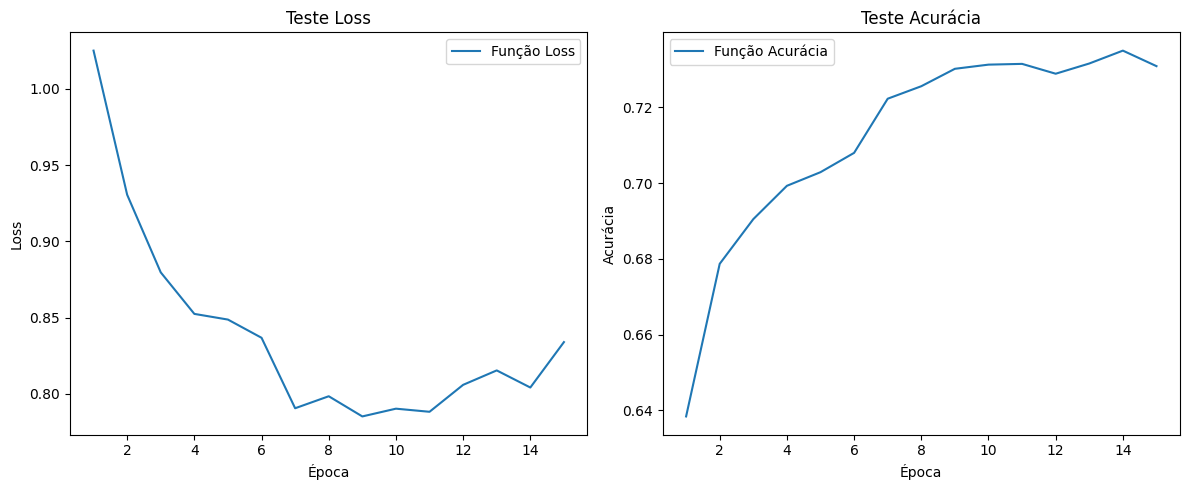

In [ ]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

plt.plot(range(1, epochs + 1),tl_test_loss,label='Função Loss')

plt.title('Teste Loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(range(1, epochs + 1),tl_test_accuracy,label='Função Acurácia')

plt.title('Teste Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()